># Import necessary libraries

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

># Mount Google Drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


---
># **Convert .csv to .parquet for faster processing (DO NOT RUN AGAIN)**
---

In [ ]:
# Define column names
column_names = [
    "class_label", "lepton_pT", "lepton_eta", "lepton_phi",
    "missing_energy_magnitude", "missing_energy_phi",
    "jet1_pt", "jet1_eta", "jet1_phi", "jet1_b-tag",
    "jet2_pt", "jet2_eta", "jet2_phi", "jet2_b-tag",
    "jet3_pt", "jet3_eta", "jet3_phi", "jet3_b-tag",
    "jet4_pt", "jet4_eta", "jet4_phi", "jet4_b-tag",
    "m_jj", "m_jjj", "m_lv", "m_jlv", "m_bb", "m_wbb", "m_wwbb"
]

# Path to CSV file in Google Drive
file_path = '/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/HIGGS.csv'

# Convert to Parquet (only run once)
HIGGS = pd.read_csv(file_path, header=None, names=column_names, engine="pyarrow")
HIGGS.to_parquet("/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/HIGGS.parquet")


---

># Basic Statistical Analysis

In [3]:
# Path to the Parquet file
parquet_path = "/content/drive/MyDrive/Sem6Projects/ML/0. Datasets/HIGGS.parquet"

# Load Parquet file
HIGGS = pd.read_parquet(parquet_path, engine="pyarrow")

HIGGS.shape

(11000000, 29)

In [4]:
# Display head
HIGGS.head()

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,...,jet4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [ ]:
# Display basic info
HIGGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   class_label               float64
 1   lepton_pT                 float64
 2   lepton_eta                float64
 3   lepton_phi                float64
 4   missing_energy_magnitude  float64
 5   missing_energy_phi        float64
 6   jet1_pt                   float64
 7   jet1_eta                  float64
 8   jet1_phi                  float64
 9   jet1_b-tag                float64
 10  jet2_pt                   float64
 11  jet2_eta                  float64
 12  jet2_phi                  float64
 13  jet2_b-tag                float64
 14  jet3_pt                   float64
 15  jet3_eta                  float64
 16  jet3_phi                  float64
 17  jet3_b-tag                float64
 18  jet4_pt                   float64
 19  jet4_eta                  float64
 20  jet4_phi              

In [5]:
# Descriptive statistics
HIGGS.describe()

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,...,jet4_eta,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,9.914658e-01,-8.297618e-06,-1.327225e-05,9.985364e-01,2.613459e-05,9.909152e-01,-2.027520e-05,7.716199e-06,9.999687e-01,...,-5.756954e-06,1.744903e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749747e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [ ]:
# Checking NULL values
HIGGS.isnull().sum()

,0
class_label,0
lepton_pT,0
lepton_eta,0
lepton_phi,0
missing_energy_magnitude,0
missing_energy_phi,0
jet1_pt,0
jet1_eta,0
jet1_phi,0
jet1_b-tag,0


In [ ]:
# Checking duplicate values
HIGGS.nunique()

,0
class_label,2
lepton_pT,27983
lepton_eta,5001
lepton_phi,6284
missing_energy_magnitude,1249475
missing_energy_phi,2218464
jet1_pt,45559
jet1_eta,5999
jet1_phi,6284
jet1_b-tag,3


># Check for Class Imbalances

Class Counts:
 class_label
1.0    5829123
0.0    5170877
Name: count, dtype: int64

Difference between class counts: 658246


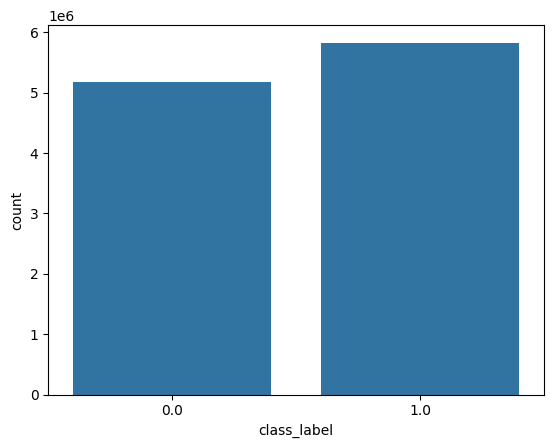

In [ ]:
# Count occurrences of each class
class_counts = HIGGS["class_label"].value_counts()
print("Class Counts:\n", class_counts)

# Calculate the difference
class_difference = abs(class_counts.iloc[0] - class_counts.iloc[1])
print("\nDifference between class counts:", class_difference)

# Plot the class distribution
sns.countplot(x="class_label", data=HIGGS)
plt.show()


># Bivariate Analysis between features

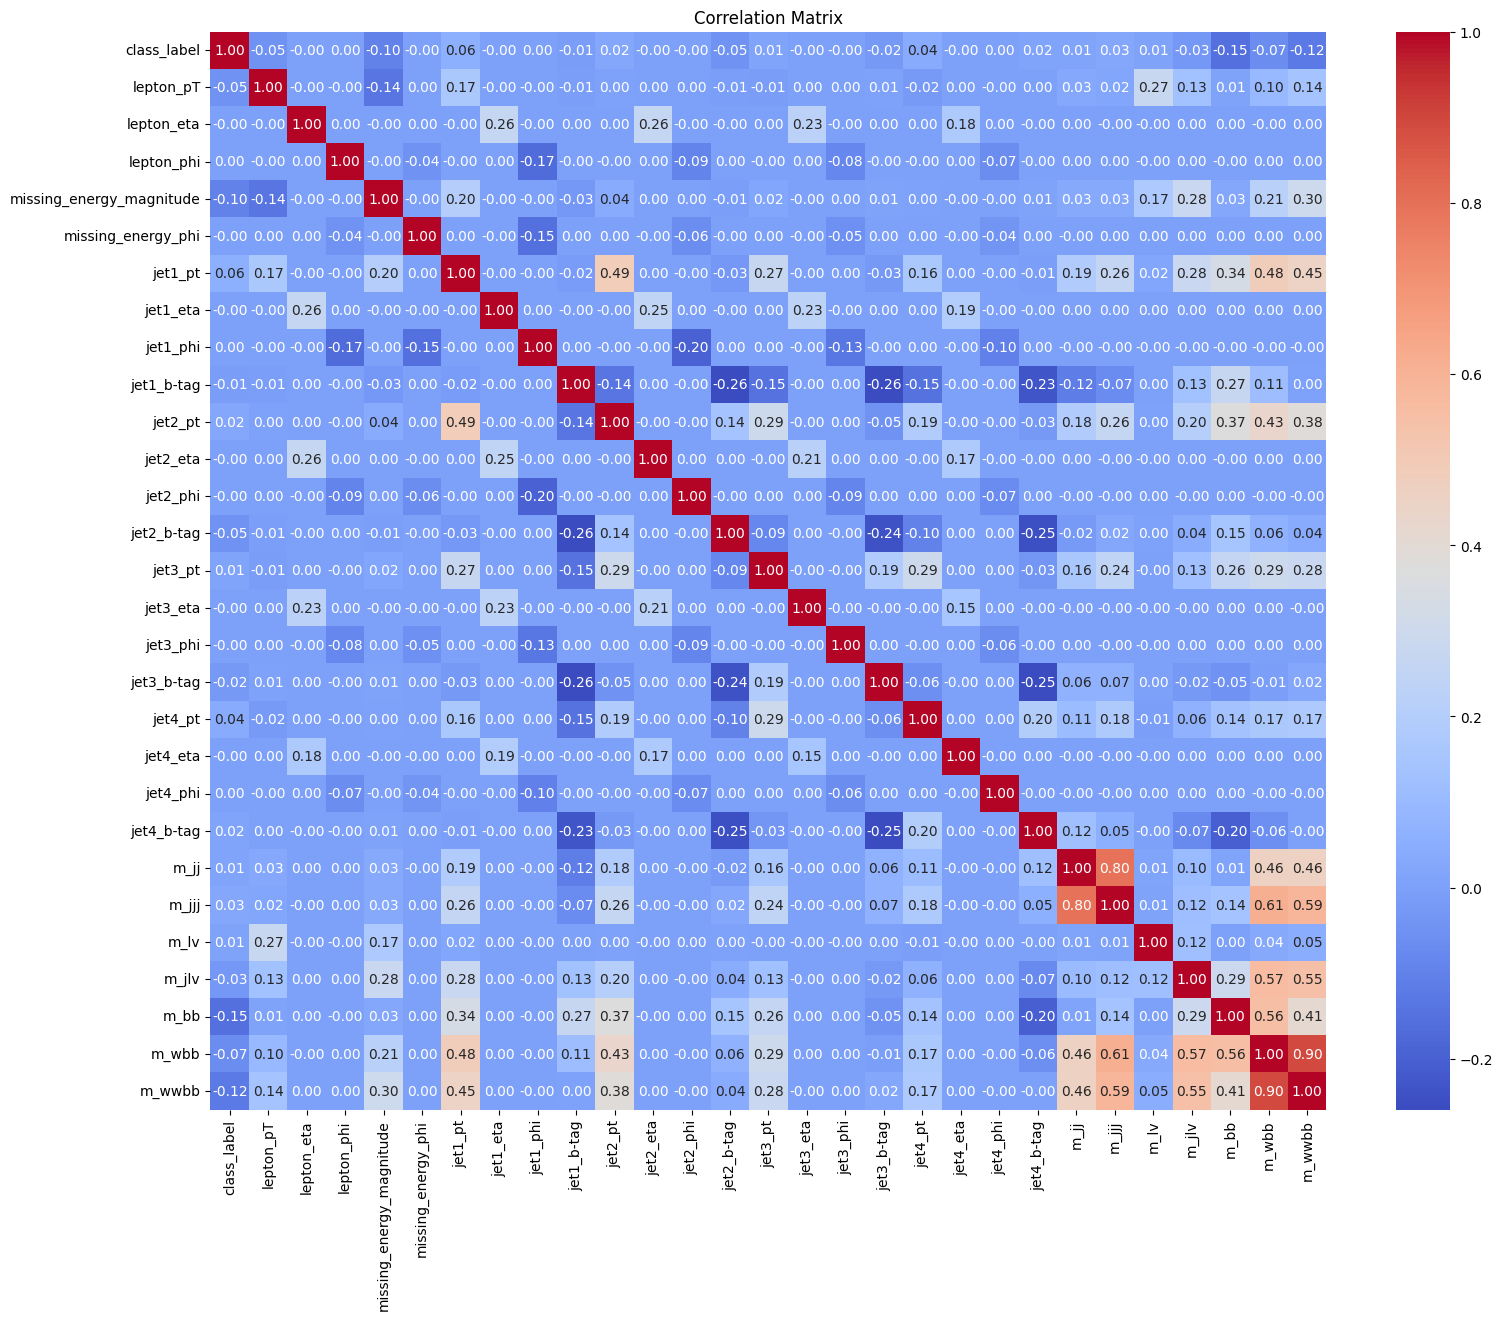

In [ ]:
# Correlation between features
correlation_matrix = HIGGS.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

># Histograms

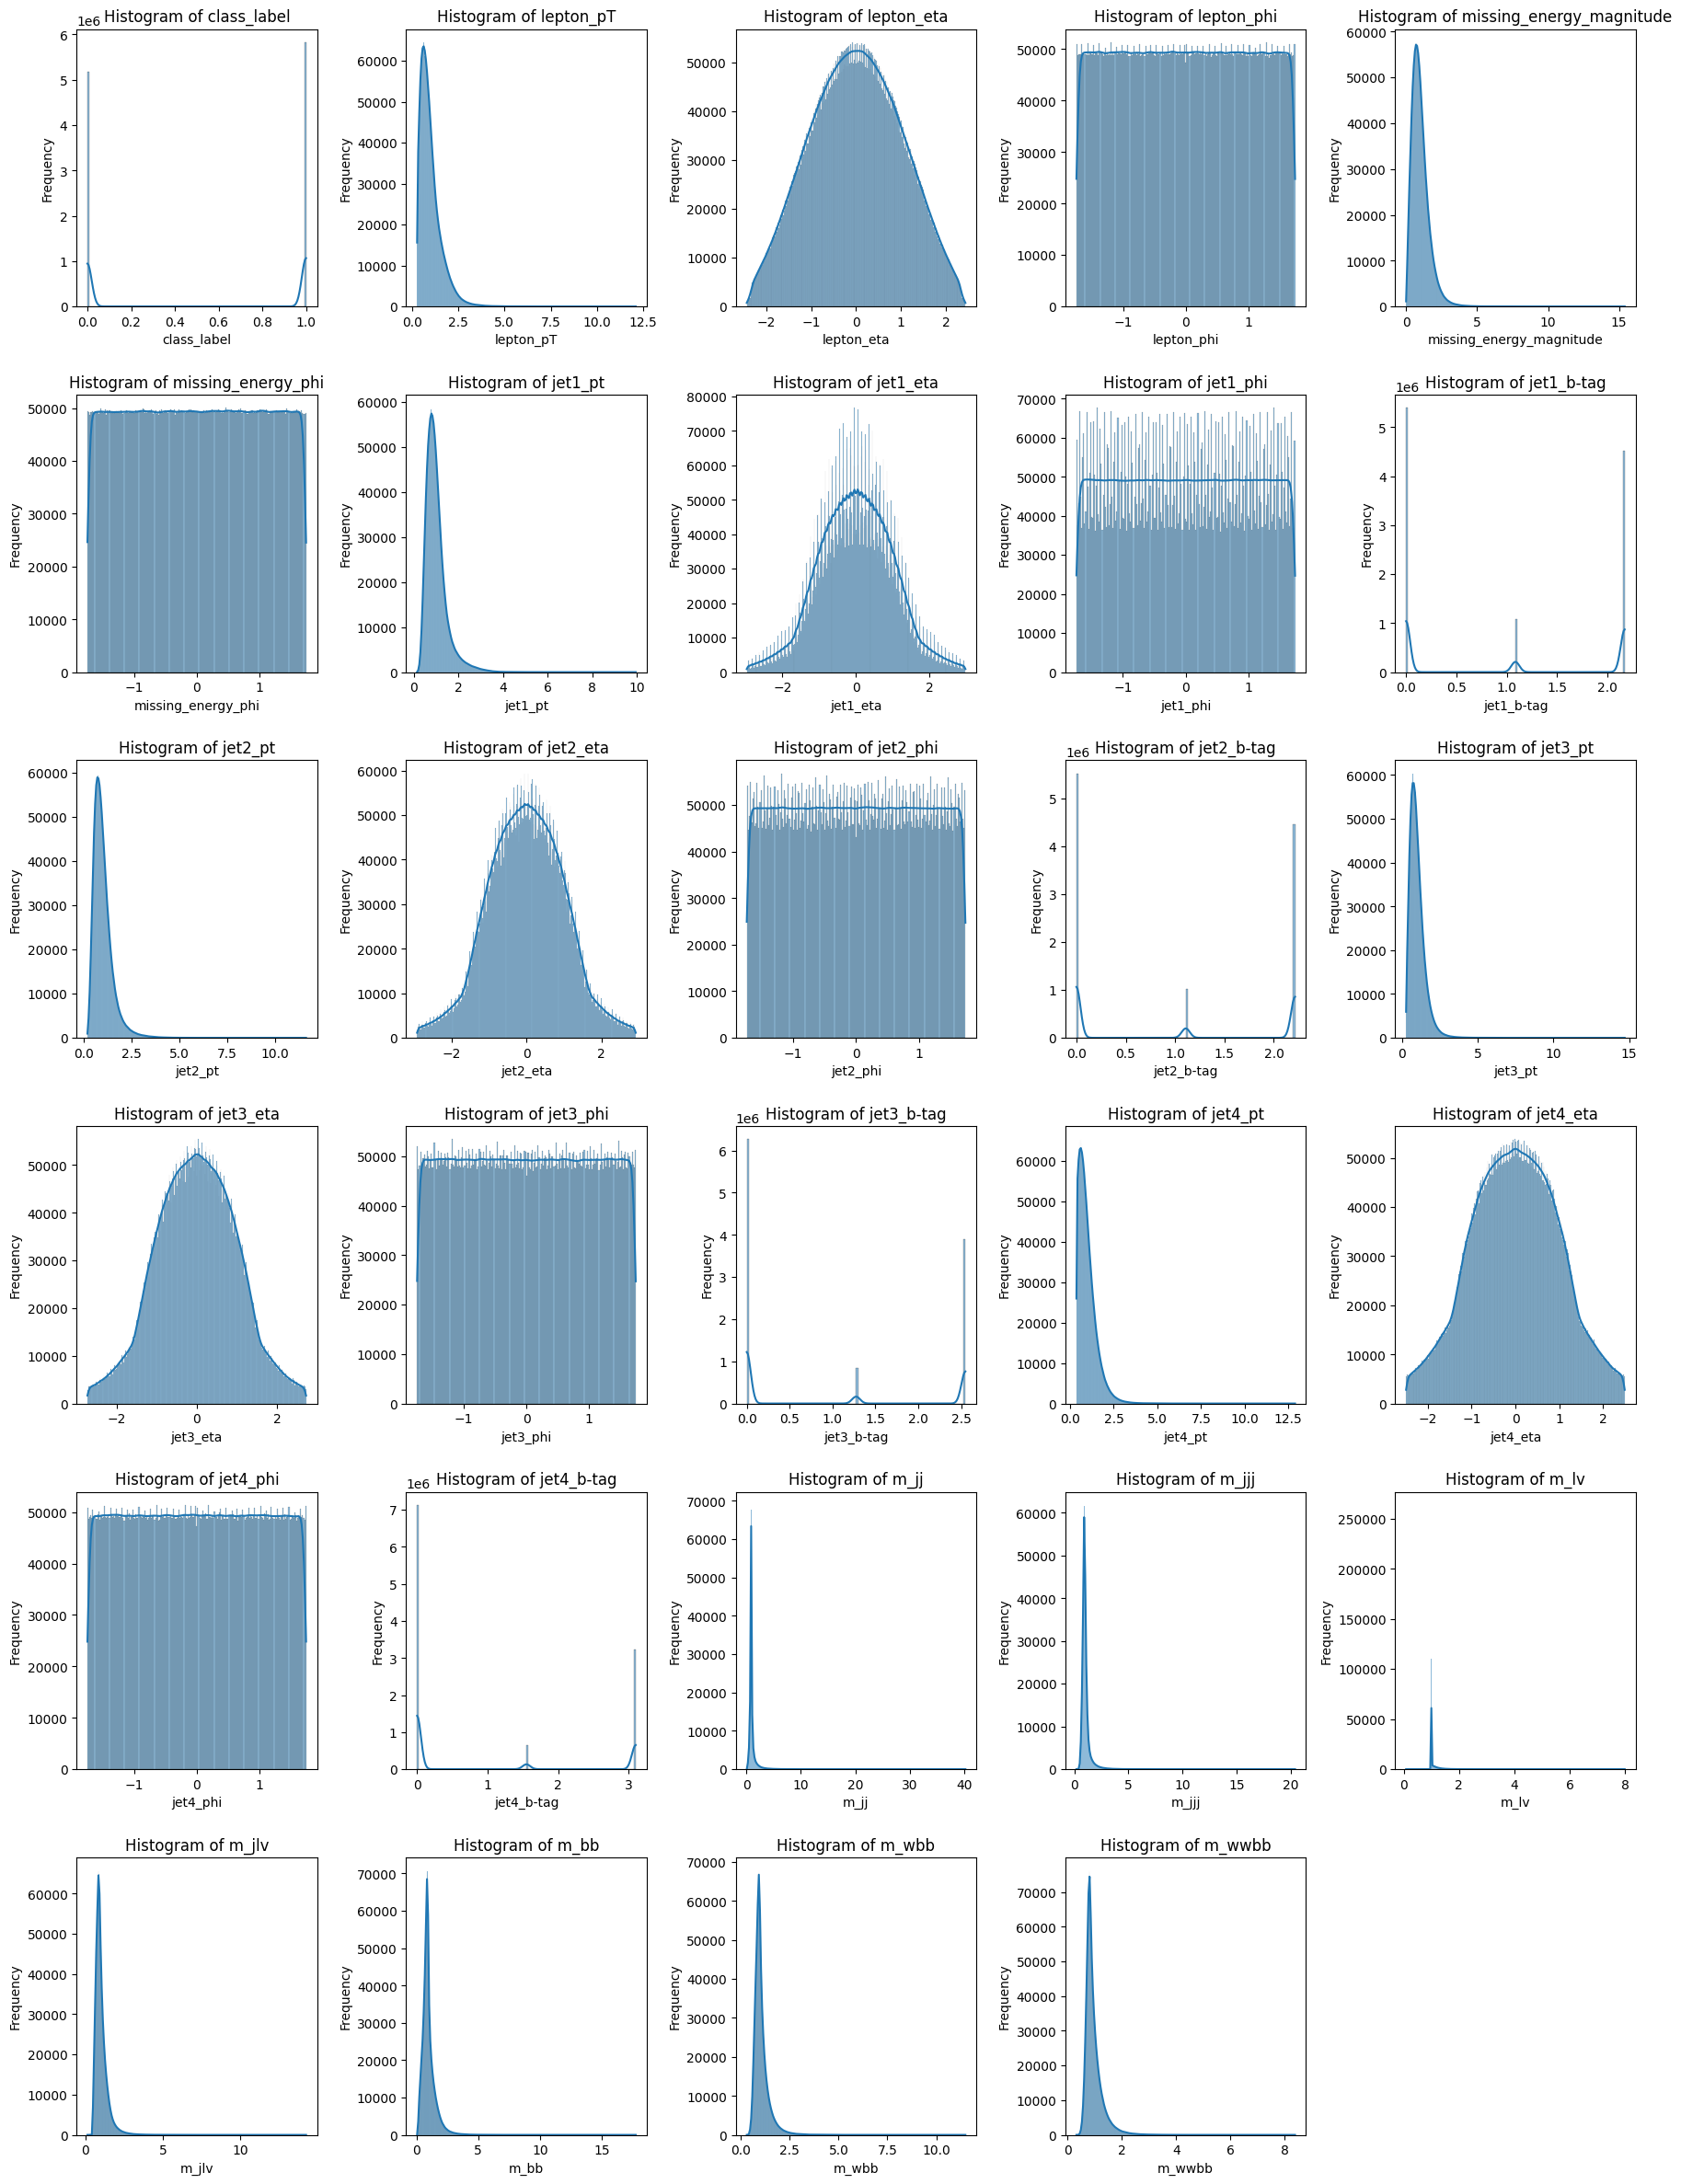

In [6]:
# num_cols = len(HIGGS.columns)
# cols_per_row = 4
# rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

# fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
# axes = axes.flatten()  # Flatten to 1D array for easy indexing

# for i, column in enumerate(HIGGS.columns):
#     sns.histplot(HIGGS[column], kde=True, ax=axes[i])
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# # Remove unused subplots if any
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

num_cols = len(HIGGS.columns)
cols_per_row = 5  # Set 5 plots per row
rows = (num_cols // cols_per_row) + (num_cols % cols_per_row > 0)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4 * rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot histograms
for i, column in enumerate(HIGGS.columns):
    sns.histplot(HIGGS[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


># Box Plots for Outlier Analysis

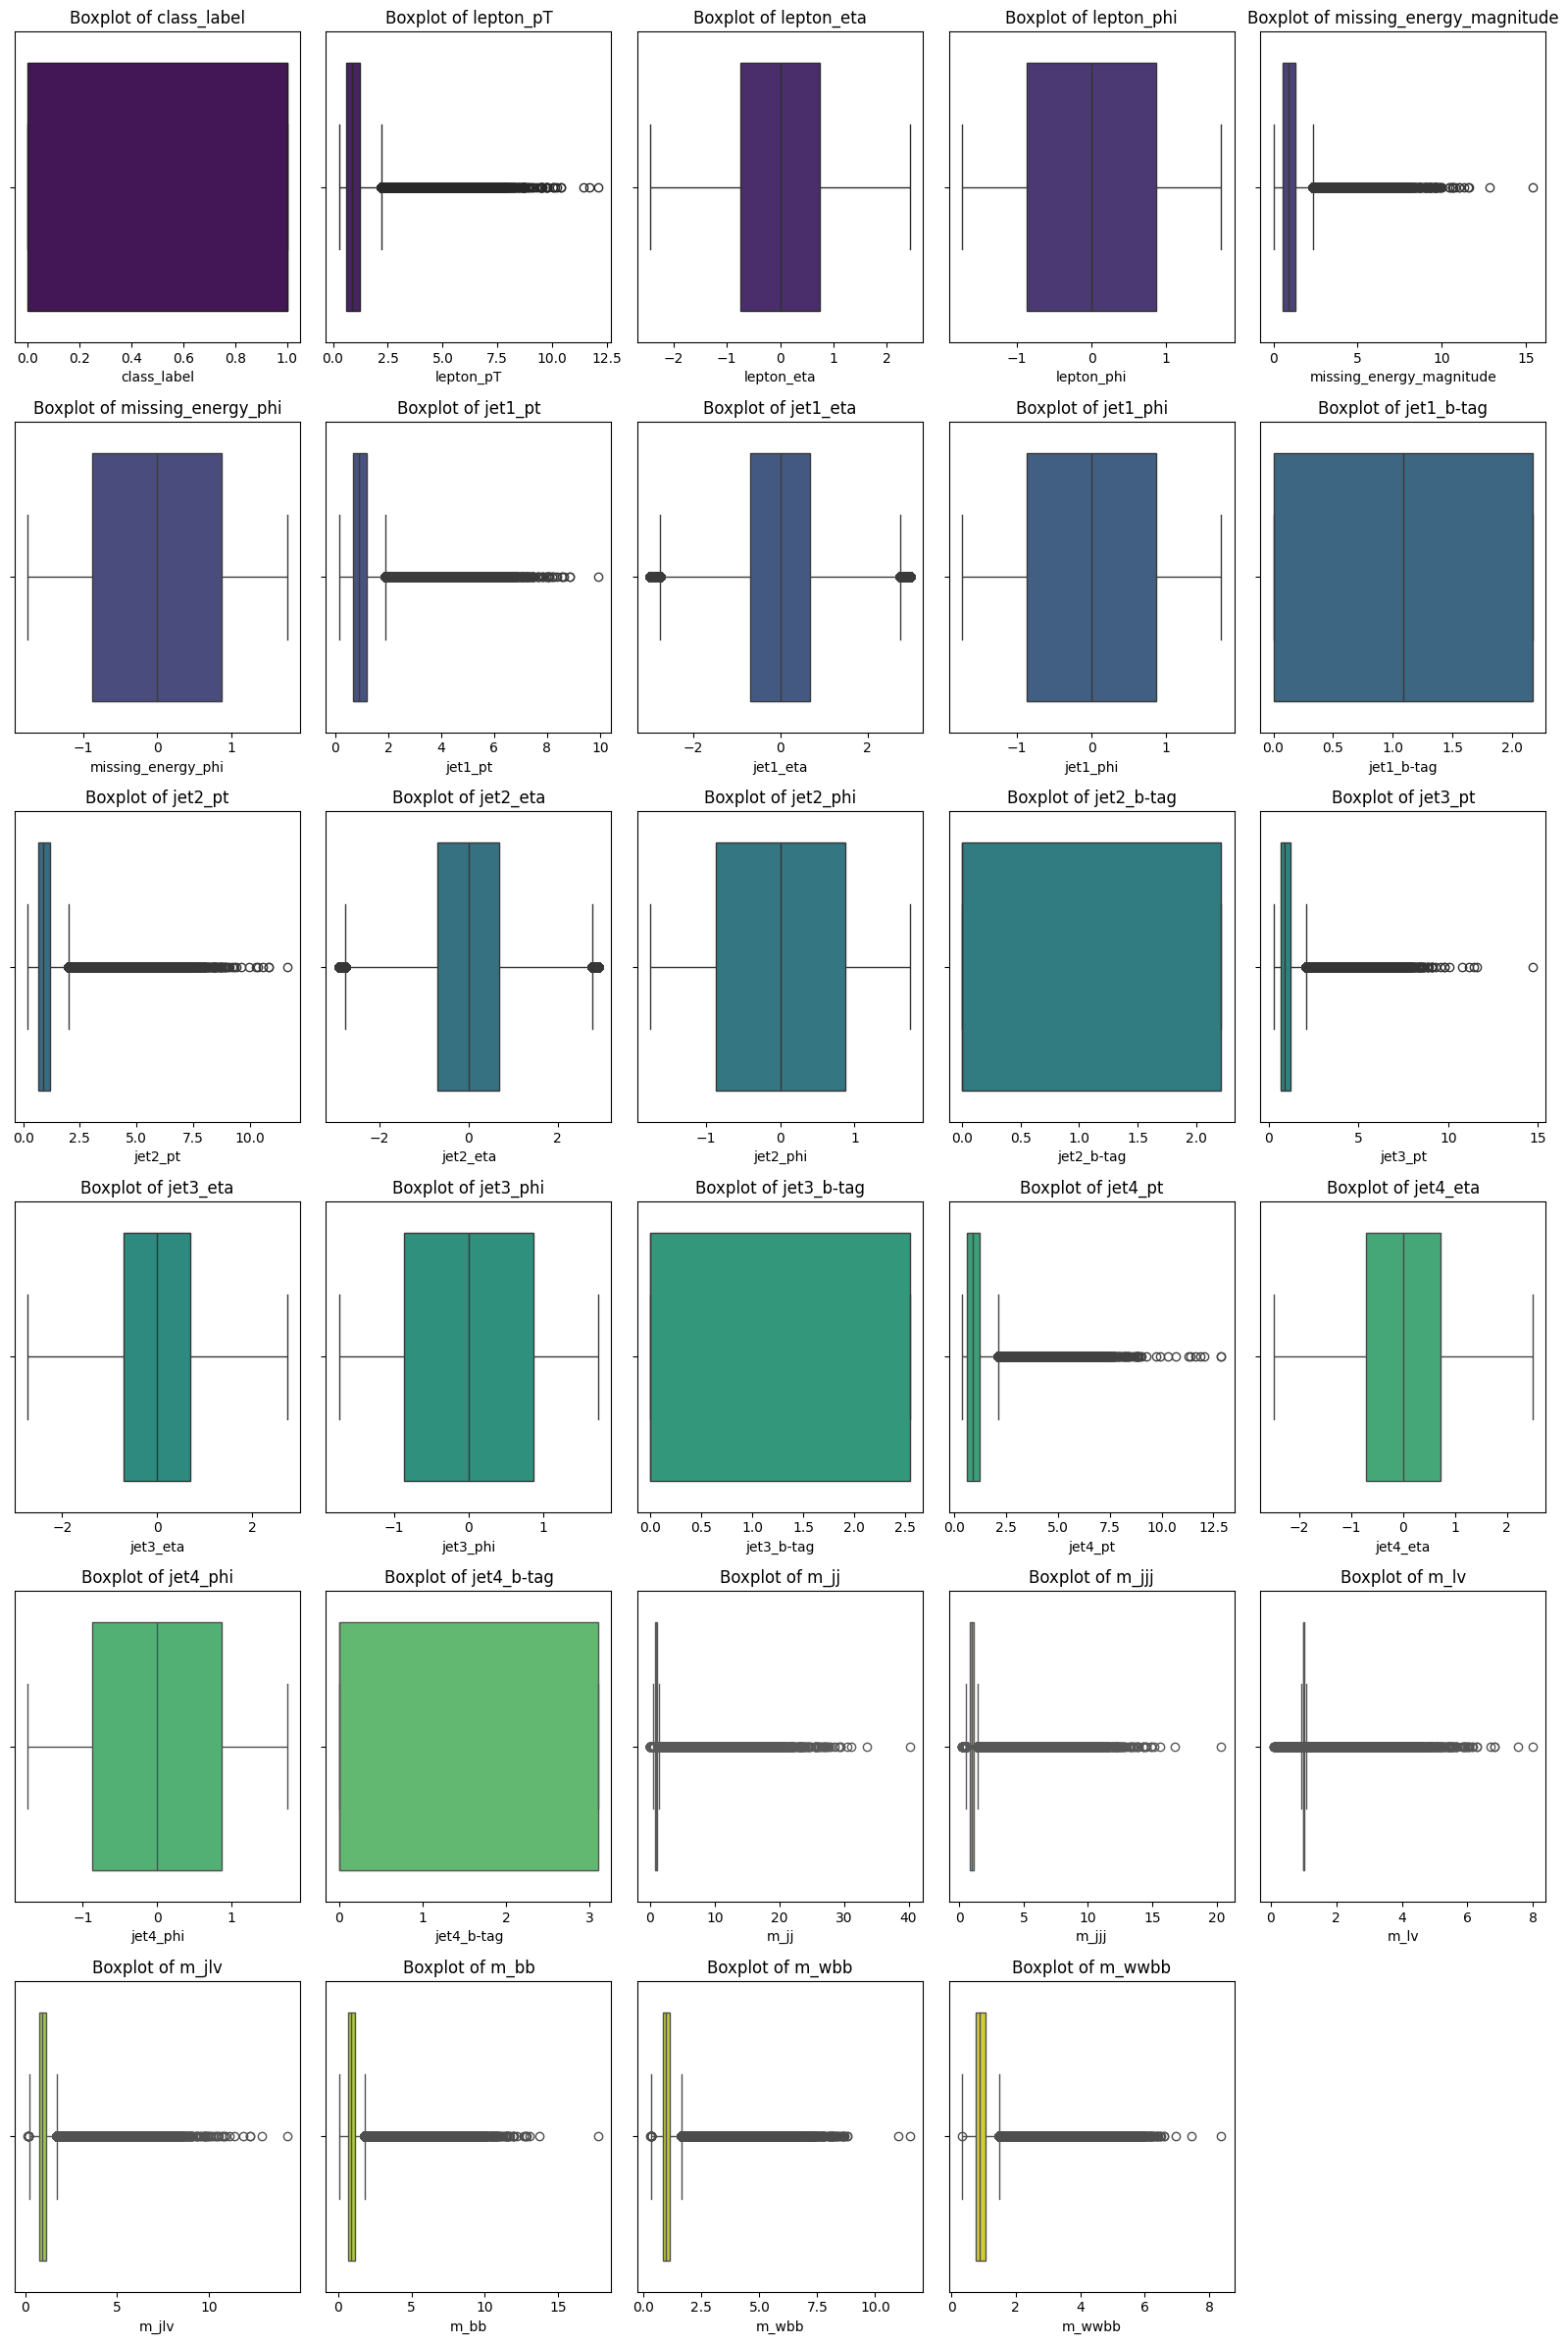

In [7]:
cols_per_row = 5
num_cols = len(HIGGS.columns)
rows = int(np.ceil(num_cols / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()

# Choose a color palette
palette = sns.color_palette("viridis", num_cols)

for i, column in enumerate(HIGGS.columns):
    sns.boxplot(x=HIGGS[column], ax=axes[i], color=palette[i % len(palette)])
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
